<a href="https://colab.research.google.com/github/priyankanarwade/Machine_Learning_Project/blob/main/Deep_Learning_tweet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1)Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.__version__

'3.7'

In [ ]:
nltk.download('twitter_samples')


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
from nltk.corpus import twitter_samples

In [ ]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [ ]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [ ]:
len(all_positive_tweets)

5000

In [ ]:
len(all_negative_tweets)

5000

In [ ]:
df_positive = pd.DataFrame(all_positive_tweets)


In [ ]:
df_positive.shape

(5000, 1)

In [ ]:
df_negative = pd.DataFrame(all_negative_tweets)

In [ ]:
df_negative.shape

(5000, 1)

In [ ]:
df_positive.head()

,0
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...
1,@Lamb2ja Hey James! How odd :/ Please call our...
2,@DespiteOfficial we had a listen last night :)...
3,@97sides CONGRATS :)
4,yeaaaah yippppy!!! my accnt verified rqst has...


In [ ]:
df_positive['pos'] = 1

In [ ]:
df_positive.head()

,0,pos
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1


In [ ]:
df_negative['pos'] = 0

In [ ]:
df_negative.head()

,0,pos
0,hopeless for tmr :(,0
1,Everything in the kids section of IKEA is so c...,0
2,@Hegelbon That heart sliding into the waste ba...,0
3,"“@ketchBurning: I hate Japanese call him ""bani...",0
4,"Dang starting next week I have ""work"" :(",0


In [ ]:
df =pd.concat([df_positive,df_negative]).reset_index(drop=True)

In [ ]:
df.head()

,0,pos
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1


In [ ]:
# shuffling the rows
df = df.sample(frac = 1)

In [ ]:
df.head()

,0,pos
2280,@HollyyLive yo yall should invite me for ranke...,1
6077,30 minutes and counting just to pass through t...,0
1708,Hi @StefanieScott i hope you're having a great...,1
6338,Add me on Snapchat : NicoleaPage #snapchat #ki...,0
9049,@heartissoJEDlag i have kwento :( fbc,0


In [ ]:
#null values if any
print(df.isnull().sum())

0      0
pos    0
dtype: int64


In [ ]:
#rename the column 
df.rename(columns= {0 :'tweets'}, inplace=True)

In [ ]:
# to remove non url, numbers and punctuations
import re

In [ ]:
def clean_url(text):
    return re.sub(r'http\s+','',text)

In [ ]:
df['tweets']=df['tweets'].apply(clean_url)

In [ ]:
# convert all uppercase to lowercase
def clean_lowercase(text):
    return str(text).lower()

In [ ]:
df['tweets'] = df['tweets'].apply(clean_lowercase)

In [ ]:
# tokanization 
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def clean_tokenization(text):
    return word_tokenize(text)

In [ ]:
df['tweets'] = df['tweets'].apply(clean_tokenization)

In [ ]:
#importing the libraries required to remove the stopwords and punctuation
from nltk.corpus import stopwords


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
stop_words =set(stopwords.words('english'))

def clean_stopwords(token):
    return [item for item in token if item not in stop_words]

In [ ]:
df['tweets'] = df['tweets'].apply(clean_stopwords)

In [ ]:
df['tweets'][1]

['@',
 'lamb2ja',
 'hey',
 'james',
 '!',
 'odd',
 ':',
 '/',
 'please',
 'call',
 'contact',
 'centre',
 '02392441234',
 'able',
 'assist',
 ':',
 ')',
 'many',
 'thanks',
 '!']

In [ ]:
#deleting words having length >=3
def clean_length(token):
  return [i for i in token if len(i)>3]

In [ ]:
df['tweets']=df['tweets'].apply(clean_length)

In [ ]:
df['tweets'][1]

['lamb2ja',
 'james',
 'please',
 'call',
 'contact',
 'centre',
 '02392441234',
 'able',
 'assist',
 'many',
 'thanks']

In [ ]:
# again converting tokens to a string
def convert_to_string(text):
  return " ".join(text)

In [ ]:
df['tweets']=df['tweets'].apply(convert_to_string)

In [ ]:
df['tweets'][1]

'lamb2ja james please call contact centre 02392441234 able assist many thanks'

In [ ]:
!pip install clean-text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 4.9 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=317e26eacef1ecafe7a2b4dadf002972568dc3508012b3035d77eb29915bcf91
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
# remove emoji from data
from cleantext import clean
clean(df, no_emoji=True)

'tweets pos\n2280 hollyylive yall invite ranked 1\n6077 minutes counting pass edsa ayala tunnel still ... 0\n1708 stefaniescott hope great time full happiness love 1\n6338 snapchat nicoleapage snapchat kiksex kikmeboys... 0\n9049 heartissojedlag kwento 0\n... ... ...\n3994 snapchat shoshannavassil snapchat addmeonsnapc... 1\n8876 girl must google plus convince ends hang outfwith 0\n6467 sophiasam013 leiwaleyn hate 0\n5924 come carlton 0\n4523 good afternoon twitterfollowerswhatsup happyfr... 1\n[10000 rows x 2 columns]'

2)Data preparation 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['tweets']
y = df['pos']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


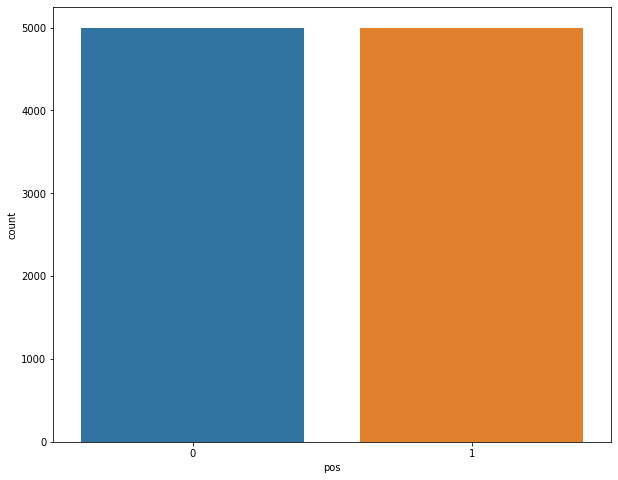

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y, data=df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 43)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
vectorizer = TfidfVectorizer( 
                             strip_accents='unicode', 
                             decode_error='replace',
                             dtype='int32',                              
                             analyzer="word", 
                             ngram_range=(1, 2), 
                             min_df=2)

In [ ]:
Xtrain = vectorizer.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning,


In [ ]:
Xtrain.shape

(8000, 5130)

In [ ]:
Xtest = vectorizer.transform(X_test)

In [ ]:
Xtest.shape


(2000, 5130)

In [ ]:
selector = SelectKBest(f_classif, k = min(5000, Xtrain.shape[1]))
selector.fit(Xtrain, y_train)

In [ ]:
Xtrain = selector.transform(Xtrain).astype('float32')
Xtest = selector.transform(Xtest).astype('float32')

In [ ]:
Xtrain.shape

(8000, 5000)

In [ ]:
Xtest.shape

(2000, 5000)

In [ ]:
ytrain = np.array(y_train)
ytest = np.array(y_test)

In [ ]:
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

3) Model Bulding

In [ ]:
import tensorflow
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout

In [ ]:
tweetANN = Sequential()

In [ ]:
tweetANN.add(Dense(units=512, activation='relu', input_dim=5000))
tweetANN.add(Dense(units=1, activation='sigmoid'))

In [ ]:
tweetANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

mc = ModelCheckpoint(filepath='tweets_pos.h5', monitor='val_accuracy', verbose=1, save_best_only=True)


In [ ]:
history = tweetANN.fit(Xtrain, ytrain, epochs=10, callbacks=[mc], validation_split=0.2)

Epoch 1/10
199/200 [============================>.] - ETA: 0s - loss: 0.5892 - accuracy: 0.6886
Epoch 1: val_accuracy improved from -inf to 0.74813, saving model to tweets_pos.h5
200/200 [==============================] - 5s 21ms/step - loss: 0.5886 - accuracy: 0.6888 - val_loss: 0.5068 - val_accuracy: 0.7481
Epoch 2/10
200/200 [==============================] - ETA: 0s - loss: 0.3776 - accuracy: 0.8209
Epoch 2: val_accuracy did not improve from 0.74813
200/200 [==============================] - 4s 20ms/step - loss: 0.3776 - accuracy: 0.8209 - val_loss: 0.5228 - val_accuracy: 0.7381
Epoch 3/10
199/200 [============================>.] - ETA: 0s - loss: 0.2703 - accuracy: 0.8758
Epoch 3: val_accuracy did not improve from 0.74813
200/200 [==============================] - 7s 35ms/step - loss: 0.2705 - accuracy: 0.8755 - val_loss: 0.5944 - val_accuracy: 0.7156
Epoch 4/10
200/200 [==============================] - ETA: 0s - loss: 0.2126 - accuracy: 0.9045
Epoch 4: val_accuracy did not impro

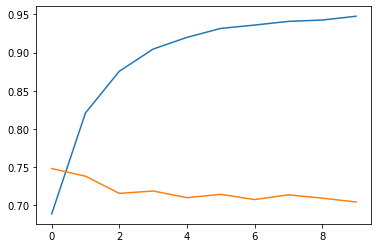

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
newmodel = load_model('tweets_pos.h5')

In [ ]:
newmodel.evaluate(Xtest, ytest)

63/63 [==============================] - 1s 7ms/step - loss: 0.5034 - accuracy: 0.7470


[0.503443717956543, 0.746999979019165]

4) Model Performance Improvement

In [ ]:
#assume Bayes error - 0.1  so accuracy = 99
#Avoidable bias or variance
#steps to solve

#Avoidable bias = bayes accuracy - training accuracy    0.99-0.9475=0.043
#Variance = training accuracy - validation accuracy     0.9475-0.7044=0.2126

#Variance < Avoidable bias

In [ ]:
tweetANN.add(Dense(units=512, activation='relu', input_dim=5000))
tweetANN.add(Dense(units=384, activation='relu'))
tweetANN.add(Dense(units=1, activation='sigmoid'))

In [ ]:
tweetANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

mc = ModelCheckpoint(filepath='bestpredictionTrue.h5', monitor='val_accuracy', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=10, verbose=1, mode='auto')
rd = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, mode='auto')

In [ ]:
history = tweetANN.fit(Xtrain, ytrain, epochs=10, callbacks=[mc], validation_split=0.2)

Epoch 1/10
200/200 [==============================] - ETA: 0s - loss: 0.2090 - accuracy: 0.9297
Epoch 1: val_accuracy improved from -inf to 0.70750, saving model to bestpredictionTrue.h5
200/200 [==============================] - 5s 24ms/step - loss: 0.2090 - accuracy: 0.9297 - val_loss: 0.9307 - val_accuracy: 0.7075
Epoch 2/10
199/200 [============================>.] - ETA: 0s - loss: 0.1177 - accuracy: 0.9486
Epoch 2: val_accuracy did not improve from 0.70750
200/200 [==============================] - 5s 23ms/step - loss: 0.1179 - accuracy: 0.9484 - val_loss: 1.0736 - val_accuracy: 0.7006
Epoch 3/10
200/200 [==============================] - ETA: 0s - loss: 0.1062 - accuracy: 0.9511
Epoch 3: val_accuracy did not improve from 0.70750
200/200 [==============================] - 4s 22ms/step - loss: 0.1062 - accuracy: 0.9511 - val_loss: 1.0953 - val_accuracy: 0.7006
Epoch 4/10
198/200 [============================>.] - ETA: 0s - loss: 0.1036 - accuracy: 0.9501
Epoch 4: val_accuracy did n

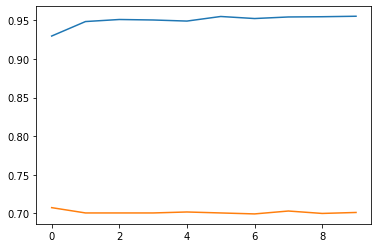

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
newmodel = load_model('tweets_pos.h5')

In [ ]:
newmodel.evaluate(Xtest, ytest)

63/63 [==============================] - 1s 7ms/step - loss: 0.5034 - accuracy: 0.7470


[0.503443717956543, 0.746999979019165]